In [1]:
import pandas as pd
import numpy as np
import tensorflow
import cv2
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('datasets/sceneclassificationdataset/train.csv')

In [2]:
test=pd.read_csv('datasets/sceneclassificationdataset/test_Dg8GF4p.csv')
# sample=pd.read_csv('datasets/sceneclassificationdataset/sample_submission_uAzsNrJ.csv')

In [3]:
train.shape

(17034, 2)

In [5]:
test.shape

(7301, 1)

In [6]:
train.head()


,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


In [7]:
test.head()

,image_name
0,3.jpg
1,5.jpg
2,6.jpg
3,11.jpg
4,14.jpg


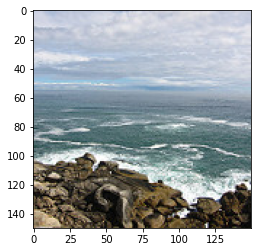

In [8]:
# import cv2

path='datasets/sceneclassificationdataset/train/7.jpg'
img=cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [9]:
img.shape

(150, 150, 3)

In [4]:
# train_names=train['image_name']
test_names=test['image_name']

In [4]:
# len(train_names),len(test_names)

In [4]:
train_images=[]
for name in train_names:
  path= 'datasets/sceneclassificationdataset/train/'+name
  img= cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img=cv2.resize(img,(150,150))
  train_images.append(img)

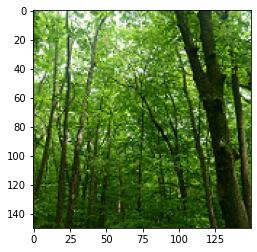

In [6]:
plt.imshow(train_images[5])

In [5]:
test_images=[]
for name in test_names:
  path= 'datasets/sceneclassificationdataset/train/'+name
  img= cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img=cv2.resize(img,(150,150))
  test_images.append(img)

In [6]:
# train_images=np.array(train_images)
test_images=np.array(test_images)

In [9]:
train_images.shape

(17034, 150, 150, 3)

In [15]:
test_images.shape

(7301, 150, 150, 3)

In [6]:
X=train_images.copy()

In [7]:
y=train['label']

In [8]:
X=X/255.0

In [9]:
mean, std = X.mean(), X.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
# global standardization of pixels
X = (X - mean) / std
# confirm it had the desired effect
mean, std = X.mean(), X.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

Mean: 0.447, Standard Deviation: 0.281
Mean: 0.000, Standard Deviation: 1.000


In [10]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.01, stratify=y, random_state=1)

In [312]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg19 = VGG19(weights='imagenet',include_top=False, input_shape=(150,150,3))
# vgg19.trainable=True
for layer in vgg19.layers[:-20]:     
    layer.trainable = False

from keras.models import Sequential
from keras.layers import Dense, Flatten,Conv2D, Dropout
from keras import Input
import keras.backend as K
K.clear_session()

model=Sequential()
model.add(vgg19)

model.add(Flatten())
model.add(Dense(1024,activation=('relu')))
model.add(Dropout(0.2))
model.add(Dense(1024,activation=('relu')))
model.add(Dropout(0.2))
model.add(Dense(1024,activation=('relu')))
model.add(Dropout(0.2))
model.add(Dense(1024,activation=('relu')))
model.add(Dropout(0.2))
model.add(Dense(1024,activation=('relu'))) 
model.add(Dropout(0.2))
model.add(Dense(6,activation=('softmax'))) #This is the classification layer

2021-09-11 18:09:39.956559: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-11 18:09:40.600963: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2021-09-11 18:09:40.601016: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14805 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:3d:00.0, compute capability: 7.5


In [26]:
# from tensorflow.keras.applications.xception import Xception
# xception = Xception(weights='imagenet',include_top=False, input_shape=(150,150,3))
# # xception.trainable=True
# for layer in xception.layers[:-2]:     
#     layer.trainable = False

# from keras.models import Sequential
# from keras.layers import Dense, Flatten,Conv2D, Dropout
# from keras import Input
# import keras.backend as K
# K.clear_session()

# model=Sequential()
# model.add(xception)

# model.add(Flatten())

# model.add(Dense(1024,activation=('relu')))
# model.add(Dropout(0.2))
# model.add(Dense(1024,activation=('relu'))) 
# model.add(Dropout(0.2))
# model.add(Dense(1024,activation=('relu'))) 
# model.add(Dropout(0.2))
# model.add(Dense(1024,activation=('relu')))
# model.add(Dropout(0.2))
# model.add(Dense(6,activation=('softmax'))) #This is the classification layer

In [27]:
# from tensorflow.keras.applications.vgg16 import VGG16
# vgg16 = VGG16(weights='imagenet',include_top=False, input_shape=(150,150,3))
# vgg16.trainable=True
# # for layer in vgg19.layers[:-20]:     
# #     layer.trainable = False

# from keras.models import Sequential
# from keras.layers import Dense, Flatten,Conv2D, Dropout
# from keras import Input
# import keras.backend as K
# K.clear_session()

# model=Sequential()
# model.add(vgg16)

# model.add(Flatten())

# model.add(Dense(1024,activation=('relu')))
# model.add(Dropout(0.2))
# model.add(Dense(1024,activation=('relu'))) 
# model.add(Dropout(0.2))
# model.add(Dense(1024,activation=('relu'))) 
# model.add(Dropout(0.2))
# model.add(Dense(1024,activation=('relu')))
# model.add(Dropout(0.2))
# model.add(Dense(6,activation=('softmax'))) #This is the classification layer

In [28]:
# from tensorflow.keras.applications.resnet_v2 import ResNet152V2
# resnet = ResNet152V2(weights='imagenet',include_top=False, input_shape=(150,150,3))
# resnet.trainable=True
# # for layer in resnet.layers[:-15]:
# #     layer.trainable=False
# from keras.models import Sequential
# from keras.layers import Dense, Flatten,Conv2D, Dropout
# from keras import Input
# import keras.backend as K
# K.clear_session()

# model=Sequential()
# model.add(resnet)

# model.add(Flatten())

# model.add(Dense(1024,activation=('relu')))
# model.add(Dropout(0.2))
# model.add(Dense(1024,activation=('relu'))) 
# model.add(Dropout(0.2))
# model.add(Dense(1024,activation=('relu'))) 
# model.add(Dropout(0.2))
# model.add(Dense(1024,activation=('relu')))
# model.add(Dropout(0.2))
# model.add(Dense(6,activation=('softmax'))) #This is the classification layer

In [29]:
# inception.layers

In [30]:
# from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
# inception = InceptionResNetV2(weights='imagenet',include_top=False, input_shape=(150,150,3))
# # inception.trainable=True

# for layer in inception.layers[:-50]:
#     layer.trainable=False
# from keras.models import Sequential
# from keras.layers import Dense, Flatten,Conv2D, Dropout,GlobalAveragePooling2D
# from keras import Input
# import keras.backend as K
# K.clear_session()

# model=Sequential()
# model.add(inception)
# model.add(GlobalAveragePooling2D())
# model.add(Flatten())

# model.add(Dense(1024,activation=('relu')))
# model.add(Dropout(0.2))
# model.add(Dense(1024,activation=('relu'))) 
# model.add(Dropout(0.2))
# model.add(Dense(1024,activation=('relu'))) 
# model.add(Dropout(0.2))
# model.add(Dense(1024,activation=('relu')))
# model.add(Dropout(0.2))
# model.add(Dense(6,activation=('softmax')))

In [31]:
# import tensorflow
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, GlobalMaxPool2D, BatchNormalization, GlobalAveragePooling2D,Dropout
# import tensorflow.keras.backend as K
# K.clear_session()
# model=Sequential()
# model.add(Conv2D(64,3,activation='relu',input_shape=(X.shape[1:])))
# model.add(BatchNormalization())
# model.add(Conv2D(64,3,activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(64,5,strides = 2,padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.4))

# model.add(Conv2D(128,3,activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(128,3,activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(128,5, strides = 2,padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.4))

# model.add(Conv2D(256,4,activation='relu'))
# model.add(BatchNormalization())


# model.add(GlobalAveragePooling2D())
# # model.add(GlobalMaxPool2D())
# # model.add(Flatten())

# model.add(Dense(256,activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(6,activation='softmax'))

In [313]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              8389632   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1

In [13]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics="accuracy")

In [17]:
# from keras.preprocessing.image import ImageDataGenerator
# aug = ImageDataGenerator(
# #     rescale=1/255.0,
#     rotation_range=10,
#     width_shift_range=0.10,
#     height_shift_range=0.10,
#     zoom_range=0.1,
#     horizontal_flip=True
# )

In [18]:
# from keras.callbacks import LearningRateScheduler
# annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [14]:
es = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, min_delta=0.001) 
mc = tensorflow.keras.callbacks.ModelCheckpoint('best_model_s.hdf5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [15]:
history=model.fit(x_train,y_train,batch_size=32,epochs=100,callbacks=[es,mc],validation_data=(x_val,y_val))
# history = model.fit(aug.flow(x_train, y_train,128),
#          validation_data=aug.flow(x_val, y_val, 128),
#          steps_per_epoch=len(x_train) / 128, 
#          epochs=150,
#          callbacks=[es,mc,annealer])

2021-09-10 18:49:04.480562: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2021-09-10 18:49:06.245721: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8202


527/527 [==============================] - 86s 149ms/step - loss: 0.6578 - accuracy: 0.7492 - val_loss: 0.2285 - val_accuracy: 0.8947

Epoch 00001: val_accuracy improved from -inf to 0.89474, saving model to best_model_s.hdf5
Epoch 2/100
527/527 [==============================] - 66s 125ms/step - loss: 0.2788 - accuracy: 0.9097 - val_loss: 0.1915 - val_accuracy: 0.9298

Epoch 00002: val_accuracy improved from 0.89474 to 0.92982, saving model to best_model_s.hdf5
Epoch 3/100
527/527 [==============================] - 66s 124ms/step - loss: 0.2145 - accuracy: 0.9274 - val_loss: 0.1872 - val_accuracy: 0.9123

Epoch 00003: val_accuracy did not improve from 0.92982
Epoch 4/100
527/527 [==============================] - 66s 124ms/step - loss: 0.1748 - accuracy: 0.9411 - val_loss: 0.1739 - val_accuracy: 0.9415

Epoch 00004: val_accuracy improved from 0.92982 to 0.94152, saving model to best_model_s.hdf5
Epoch 5/100
527/527 [==============================] - 65s 124ms/step - loss: 0.1443 - acc

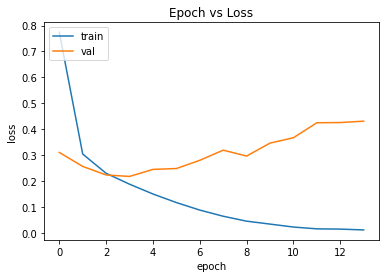

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Epoch vs Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
# from tensorflow import keras
# model = keras.models.load_model('best_model_vgg19-20.hdf5')

2021-09-10 18:41:41.268180: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-10 18:41:41.834760: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2021-09-10 18:41:41.834802: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14805 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:3d:00.0, compute capability: 7.5


In [7]:
model.load_weights('best_model_s.hdf5')

In [8]:
X_test=test_images.copy()

In [9]:
X_test= X_test/255.0

In [10]:
mean, std = X_test.mean(), X_test.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
# global standardization of pixels
X_test = (X_test - mean) / std
# confirm it had the desired effect
mean, std = X_test.mean(), X_test.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

Mean: 0.449, Standard Deviation: 0.280
Mean: -0.000, Standard Deviation: 1.000


In [11]:
pred_from_vgg=np.argmax(model.predict(X_test), axis=-1)

2021-09-10 19:35:40.932298: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-10 19:35:41.922922: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8202


In [12]:
dataset_submission=test.copy()
dataset_submission['label']=pred_from_vgg
dataset_submission.to_csv('vgg19-soutput.csv', index=False)

In [15]:
datasets=['vgg19-5output.csv','vgg16output.csv','vgg19-20output2.csv', 'xceptionoutput.csv','vgg19-soutput.csv','resnetoutput.csv']
d=pd.DataFrame()
for i in datasets:
    df=pd.read_csv(i)
    d=pd.concat([d,pd.DataFrame(df['label'])],axis=1)
d.columns=['1','2','3','4','5','6']
re = d.mode(axis=1)[0]

In [16]:
dataset_submission=test.copy()
dataset_submission['label']=re
dataset_submission.to_csv('common7.csv', index=False)